In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from matplotlib import font_manager

font_path = '../Ruda/Ruda-VariableFont_wght.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [7]:
df = pd.read_csv('data/aggrescan/Aggrescan4D.csv')

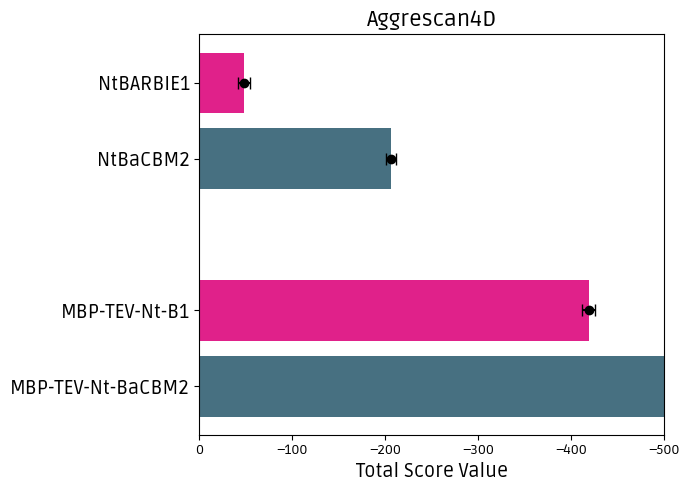

In [4]:
plot = {}
for value in list(df.values):
    splitted_name = value[0].split(' ')
    if splitted_name[0] not in plot:
        plot[splitted_name[0]] = []
        
# Total value: -1
# Average score: -2

for value in list(df.values):
    splitted_name = value[0].split(' ')
    plot[splitted_name[0]].append(value[-1])

plot_converted = {}
for key,value in plot.items():
    plot_converted[key] = [np.mean(value),np.std(value)]

plt.figure(figsize=(7,5))

i=1

k = list(plot_converted.keys())
v = list(plot_converted.values())

k,v = k[::-1],v[::-1]
x,x_pos = 0,[]

for key,value in zip(k[:-2],v[:-2]):
    
    if i % 2 == 0:
        color = '#E0218A'
        x += 1
        x_pos.append(x)
    else:
        x += 2
        x_pos.append(x)
        color = '#477081'

    # plt.bar(x,value[0],color=color)
    plt.barh(x,value[0],color=color)
    plt.errorbar(value[0],x,xerr=value[1],fmt="o",color="black",capsize=4)

    i+=1

# plt.xticks(x_pos,k)

plt.title('Aggrescan4D',fontsize=16)
plt.yticks(x_pos,k[:-2],fontsize=14)
plt.xlabel('Total Score Value',fontsize=14)
plt.xlim(0,-500)
plt.tight_layout()
plt.savefig('results/agg4d.png',dpi=600,transparent=True)
plt.show()

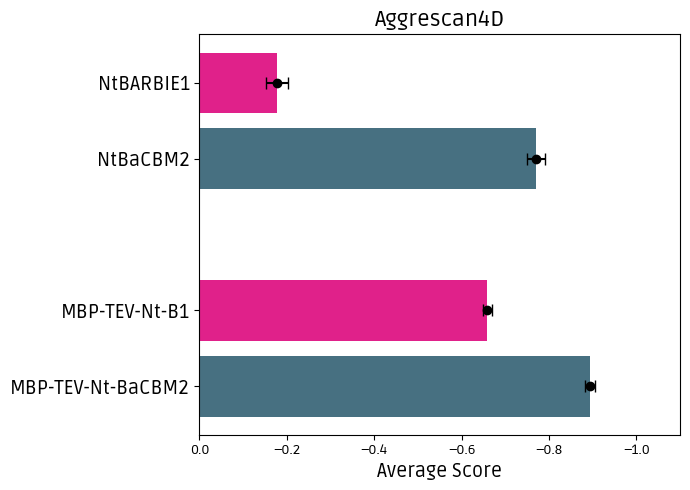

In [9]:
plot = {}
for value in list(df.values):
    splitted_name = value[0].split(' ')
    if splitted_name[0] not in plot:
        plot[splitted_name[0]] = []
        
# Total value: -1
# Average score: -2

for value in list(df.values):
    splitted_name = value[0].split(' ')
    plot[splitted_name[0]].append(value[-2])

plot_converted = {}
for key,value in plot.items():
    plot_converted[key] = [np.mean(value),np.std(value)]

plt.figure(figsize=(7,5))

i=1

k = list(plot_converted.keys())
v = list(plot_converted.values())

k,v = k[::-1],v[::-1]
x,x_pos = 0,[]

for key,value in zip(k[:-2],v[:-2]):
    
    if i % 2 == 0:
        color = '#E0218A'
        x += 1
        x_pos.append(x)
    else:
        x += 2
        x_pos.append(x)
        color = '#477081'

    # plt.bar(x,value[0],color=color)
    plt.barh(x,value[0],color=color)
    plt.errorbar(value[0],x,xerr=value[1],fmt="o",color="black",capsize=4)

    i+=1

# plt.xticks(x_pos,k)

plt.title('Aggrescan4D',fontsize=16)
plt.yticks(x_pos,k[:-2],fontsize=14)
plt.xlabel('Average Score',fontsize=14)
plt.xlim(0,-1.1)
plt.tight_layout()
plt.savefig('results/agg4d_avg.png',dpi=600,transparent=True)
plt.show()

In [8]:
barbie1_seq = 'ATFYVTFWWFFGYFFSITLKNTGFYPIYYWMLMFLYYGTLTSLYYSRISYKFYYFYVITYYGYNYTIPPYGYYTIGGTGLGLPSFLYFSKLMSY'
bacbm2_seq = 'ATFSVTSNWGSGYNFSIVIKNSGTTPIKNWKLEFDYNGNLTQVWDSKISSKINNHYVITNAGWNGEIPPGGSITIGGAGTGTPAELVNASISEN'

In [20]:
len(barbie1_seq)

94

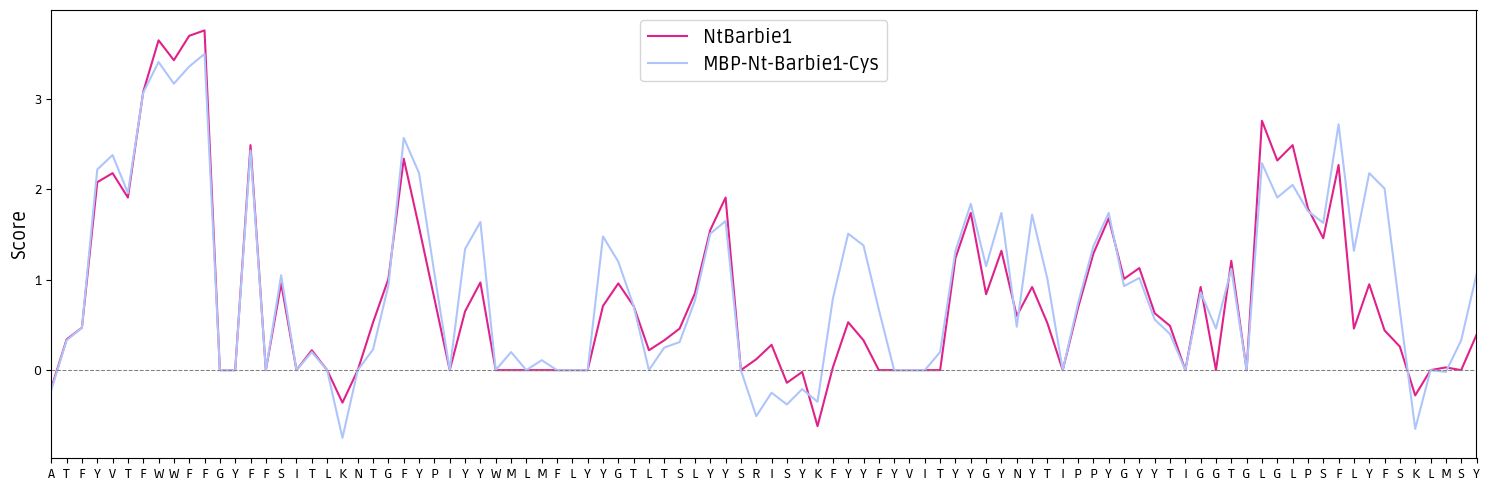

In [14]:
# tags = ['b1','cbm','ntb1','ntcbm']
tags = ['b1','ntb1','f_nt_b1']
seq_tags = [barbie1_seq,barbie1_seq,barbie1_seq,bacbm2_seq,bacbm2_seq,bacbm2_seq]
sep = ''
c=0

plt.figure(figsize=(15,5))
for tag,protein_seq in zip(tags[1:],seq_tags[1:]):

    scores = []
    for i in range(1,4):
        df = pd.read_csv(f'data/aggrescan/specs/{tag}-{i}.csv')

        joined_seq = sep.join(df['residue_name'])
        start_index = joined_seq.find(protein_seq)
        end_index = start_index + len(protein_seq)

        df = df[start_index:end_index]

        # df['start_index'] = df['residue_name'].str.find(seq)
        # df['end_index'] = df['start_index'] + df['residue_name'].str.len() - 1
        # df = df[df['start_index'] == -1]
        
        scores.append(df['score'])

    seq = {}
    for i in range(len(df['residue_name'])):
        seq[i] = []

    for score in scores:
        i=0
        for s in score:
            seq[i].append(s)
            i+=1
    
    final_res = {}
    for i in range(len(df['residue_name'])):
        final_res[i] = [round(np.mean(seq[i]),2),round(np.std(seq[i]),2)]

    plot_x,plot_y = [],[]
    for k,v in zip(seq,final_res.values()):
        plot_x.append(k)
        plot_y.append(v[0])

    if c == 0: color = '#E0218A'
    else: color = '#AEC5FB'

    if tag == 'b1': tag = 'BARBIE1'
    if tag == 'ntb1': tag = 'NtBarbie1'
    if tag == 'f_nt_b1': tag = 'MBP-Nt-Barbie1-Cys'

    plt.plot(plot_x,plot_y,label=f'{tag}',color=color)
    plt.xticks(ticks=range(len(protein_seq)), labels=list(protein_seq))
    c+=1

plt.xlim(0,93)
# plt.grid('minor')
plt.legend(fontsize=14,loc='upper center')
plt.ylabel('Score',fontsize=14)
plt.tight_layout()
plt.axhline(y=0,color='gray',linewidth=0.75,linestyle='--')
plt.savefig('results/a4d_B1.png',transparent=True,dpi=1000)
plt.show()

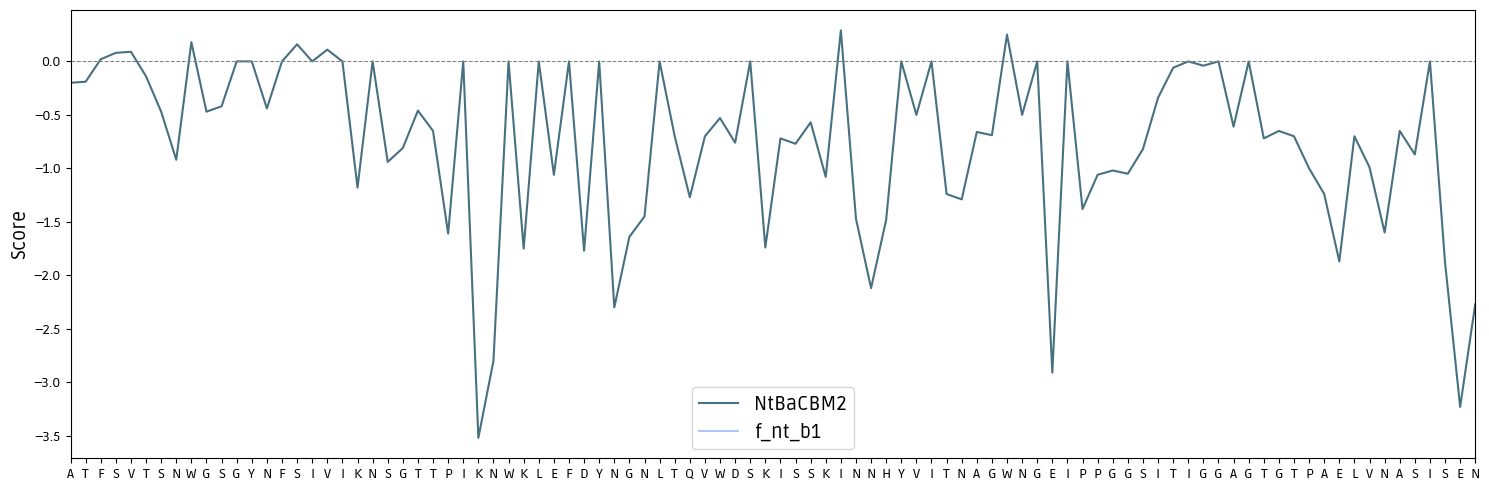

In [13]:
# tags = ['b1','cbm','ntb1','ntcbm']
tags = ['cbm','ntcbm','f_nt_b1']
seq_tags = [bacbm2_seq,bacbm2_seq,bacbm2_seq]
sep = ''
c=0

plt.figure(figsize=(15,5))
for tag,protein_seq in zip(tags[1:],seq_tags[1:]):

    scores = []
    for i in range(1,4):
        df = pd.read_csv(f'data/aggrescan/specs/{tag}-{i}.csv')

        joined_seq = sep.join(df['residue_name'])
        start_index = joined_seq.find(protein_seq)
        end_index = start_index + len(protein_seq)

        df = df[start_index:end_index]

        # df['start_index'] = df['residue_name'].str.find(seq)
        # df['end_index'] = df['start_index'] + df['residue_name'].str.len() - 1
        # df = df[df['start_index'] == -1]
        
        scores.append(df['score'])

    seq = {}
    for i in range(len(df['residue_name'])):
        seq[i] = []

    for score in scores:
        i=0
        for s in score:
            seq[i].append(s)
            i+=1
    
    final_res = {}
    for i in range(len(df['residue_name'])):
        final_res[i] = [round(np.mean(seq[i]),2),round(np.std(seq[i]),2)]

    plot_x,plot_y = [],[]
    for k,v in zip(seq,final_res.values()):
        plot_x.append(k)
        plot_y.append(v[0])

    if c == 0: color = '#477081'
    else: color = '#AEC5FB'

    if tag == 'cbm': tag = 'BaCBM2'
    if tag == 'ntcbm': tag = 'NtBaCBM2'

    plt.plot(plot_x,plot_y,label=f'{tag}',color=color)
    plt.xticks(ticks=range(len(protein_seq)), labels=list(protein_seq))
    c+=1

plt.xlim(0,93)
# plt.grid('minor')
plt.legend(fontsize=14,loc='lower center')
plt.ylabel('Score',fontsize=14)
plt.tight_layout()
plt.axhline(y=0,color='gray',linewidth=0.75,linestyle='--')
plt.savefig('results/a4d_cbm.png',transparent=True,dpi=1000)
plt.show()

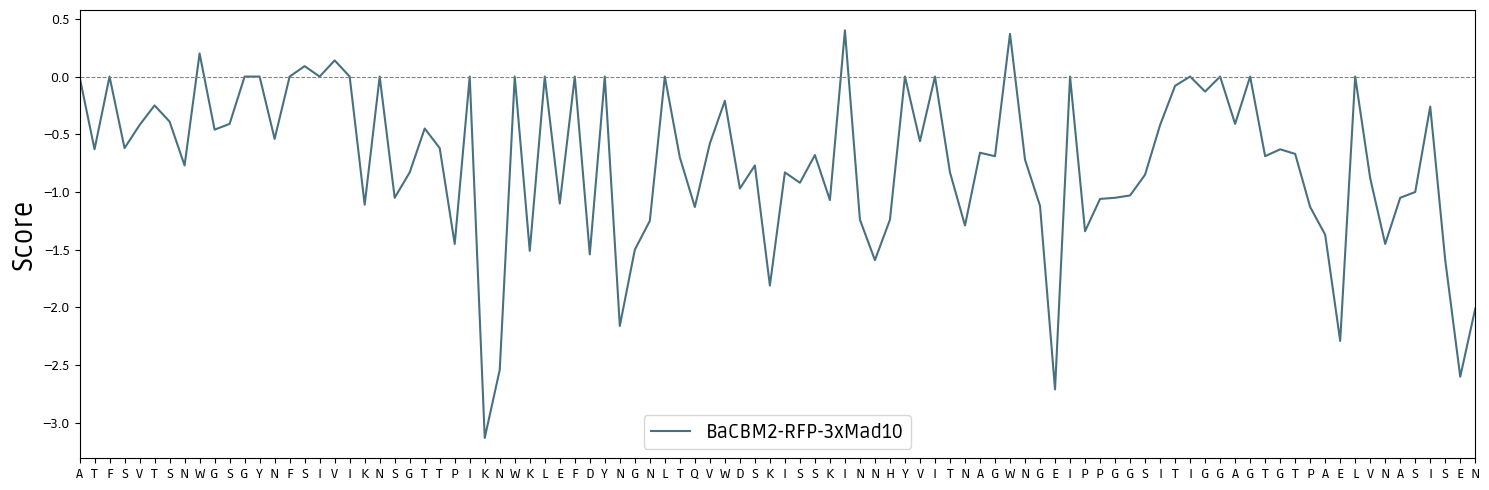

In [21]:
tags = ['cbm']
seq_tags = [bacbm2_seq]
sep = ''
c=0

plt.figure(figsize=(15,5))
for tag,protein_seq in zip(tags,seq_tags):

    scores = []
    for i in range(1,4):
        df = pd.read_csv(f'data/aggrescan/specs/{tag}-{i}.csv')

        joined_seq = sep.join(df['residue_name'])
        start_index = joined_seq.find(protein_seq)
        end_index = start_index + len(protein_seq)

        df = df[start_index:end_index]

        # df['start_index'] = df['residue_name'].str.find(seq)
        # df['end_index'] = df['start_index'] + df['residue_name'].str.len() - 1
        # df = df[df['start_index'] == -1]
        
        scores.append(df['score'])

    seq = {}
    for i in range(len(df['residue_name'])):
        seq[i] = []

    for score in scores:
        i=0
        for s in score:
            seq[i].append(s)
            i+=1
    
    final_res = {}
    for i in range(len(df['residue_name'])):
        final_res[i] = [round(np.mean(seq[i]),2),round(np.std(seq[i]),2)]

    plot_x,plot_y = [],[]
    for k,v in zip(seq,final_res.values()):
        plot_x.append(k)
        plot_y.append(v[0])

    if c == 0: color = '#477081'
    else: color = '#AEC5FB'

    if tag == 'cbm': tag = 'BaCBM2-RFP-3xMad10'
    if tag == 'ntcbm': tag = 'NtBaCBM2'

    plt.plot(plot_x,plot_y,label=f'{tag}',color=color)
    plt.xticks(ticks=range(len(protein_seq)), labels=list(protein_seq))
    c+=1

plt.xlim(0,93)
# plt.grid('minor')
plt.legend(fontsize=14,loc='lower center')
plt.ylabel('Score',fontsize=20)
plt.tight_layout()
plt.axhline(y=0,color='gray',linewidth=0.75,linestyle='--')
plt.savefig('results/a4d_cbm.png',transparent=True,dpi=1000)
plt.show()

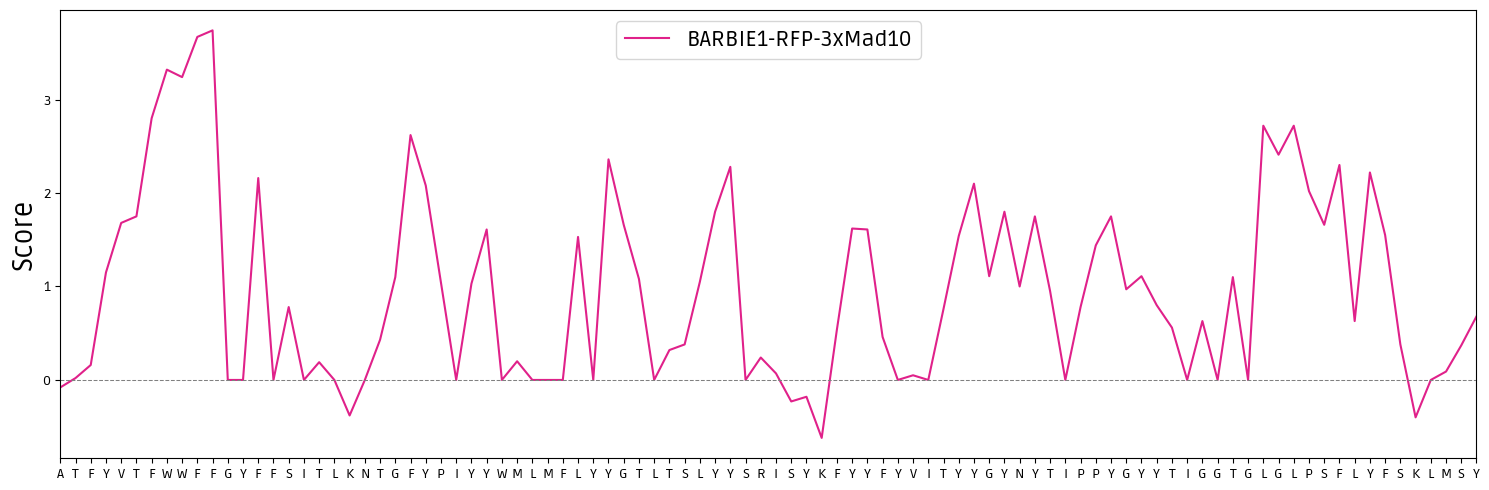

In [9]:
# tags = ['b1','cbm','ntb1','ntcbm']
tags = ['b1']
seq_tags = [barbie1_seq]
sep = ''
c=0

plt.figure(figsize=(15,5))
for tag,protein_seq in zip(tags,seq_tags):

    scores = []
    for i in range(1,4):
        df = pd.read_csv(f'data/aggrescan/specs/{tag}-{i}.csv')

        joined_seq = sep.join(df['residue_name'])
        start_index = joined_seq.find(protein_seq)
        end_index = start_index + len(protein_seq)

        df = df[start_index:end_index]

        # df['start_index'] = df['residue_name'].str.find(seq)
        # df['end_index'] = df['start_index'] + df['residue_name'].str.len() - 1
        # df = df[df['start_index'] == -1]
        
        scores.append(df['score'])

    seq = {}
    for i in range(len(df['residue_name'])):
        seq[i] = []

    for score in scores:
        i=0
        for s in score:
            seq[i].append(s)
            i+=1
    
    final_res = {}
    for i in range(len(df['residue_name'])):
        final_res[i] = [round(np.mean(seq[i]),2),round(np.std(seq[i]),2)]

    plot_x,plot_y = [],[]
    for k,v in zip(seq,final_res.values()):
        plot_x.append(k)
        plot_y.append(v[0])

    if c == 0: color = '#E0218A'
    else: color = '#AEC5FB'

    if tag == 'b1': tag = 'BARBIE1-RFP-3xMad10'
    if tag == 'ntb1': tag = 'NtBarbie1'
    if tag == 'f_nt_b1': tag = 'MBP-Nt-Barbie1-Cys'

    plt.plot(plot_x,plot_y,label=f'{tag}',color=color)
    plt.xticks(ticks=range(len(protein_seq)), labels=list(protein_seq))
    c+=1

plt.xlim(0,93)
# plt.grid('minor')
plt.legend(fontsize=16,loc='upper center')
plt.ylabel('Score',fontsize=20)
plt.tight_layout()
plt.axhline(y=0,color='gray',linewidth=0.75,linestyle='--')
plt.savefig('results/a4d_B1.png',transparent=True,dpi=1000)
plt.show()